In [21]:
from qiskit import QuantumCircuit, transpile
import qiskit.providers.fake_provider as fp
from qiskit.visualization import circuit_drawer, plot_gate_map
from math import pi

In [53]:
# FakeTokyo, FakeGuadalupe, FakeYorktown, FakeWashington: Ref
# FakeSherbrooke, FakeCairo, FakeHanoi, FakeKolkata, FakeMumbai: 현재 운용중
backend = fp.FakeGuadalupe()

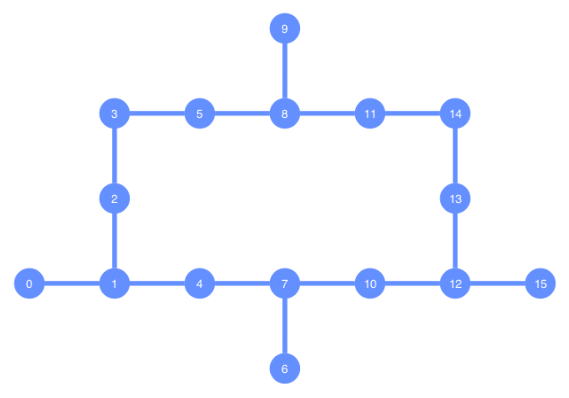

In [54]:
plot_gate_map(backend)

In [24]:
backend.configuration().n_qubits

16

In [25]:
def sub_basic(k):
    sub = QuantumCircuit(k)
    sub.h(0)
    for i in range(k-1):
        sub.cp( pi/2**(i+1), 0, i+1)
    return sub

In [26]:
def basicqft(n):
    qft = QuantumCircuit(n)
    for i in range(n,1,-1):
        qft.append(sub_basic(i), range(n-i,n))
    qft.h(n-1)
    return qft

# n = 3

## backend 안주고

In [27]:
basicqft(3).decompose(reps=3).count_ops()['cx']

6

/Users/jaewoongheo/anaconda3/envs/QRA/lib/python3.8/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


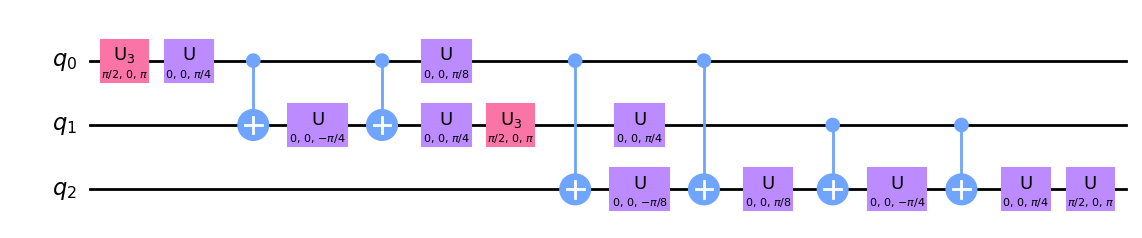

In [28]:
basicqft(3).decompose(reps=3).draw(output='mpl')

## backend 주고

In [29]:
transpile(basicqft(3), backend).count_ops()['cx']

9

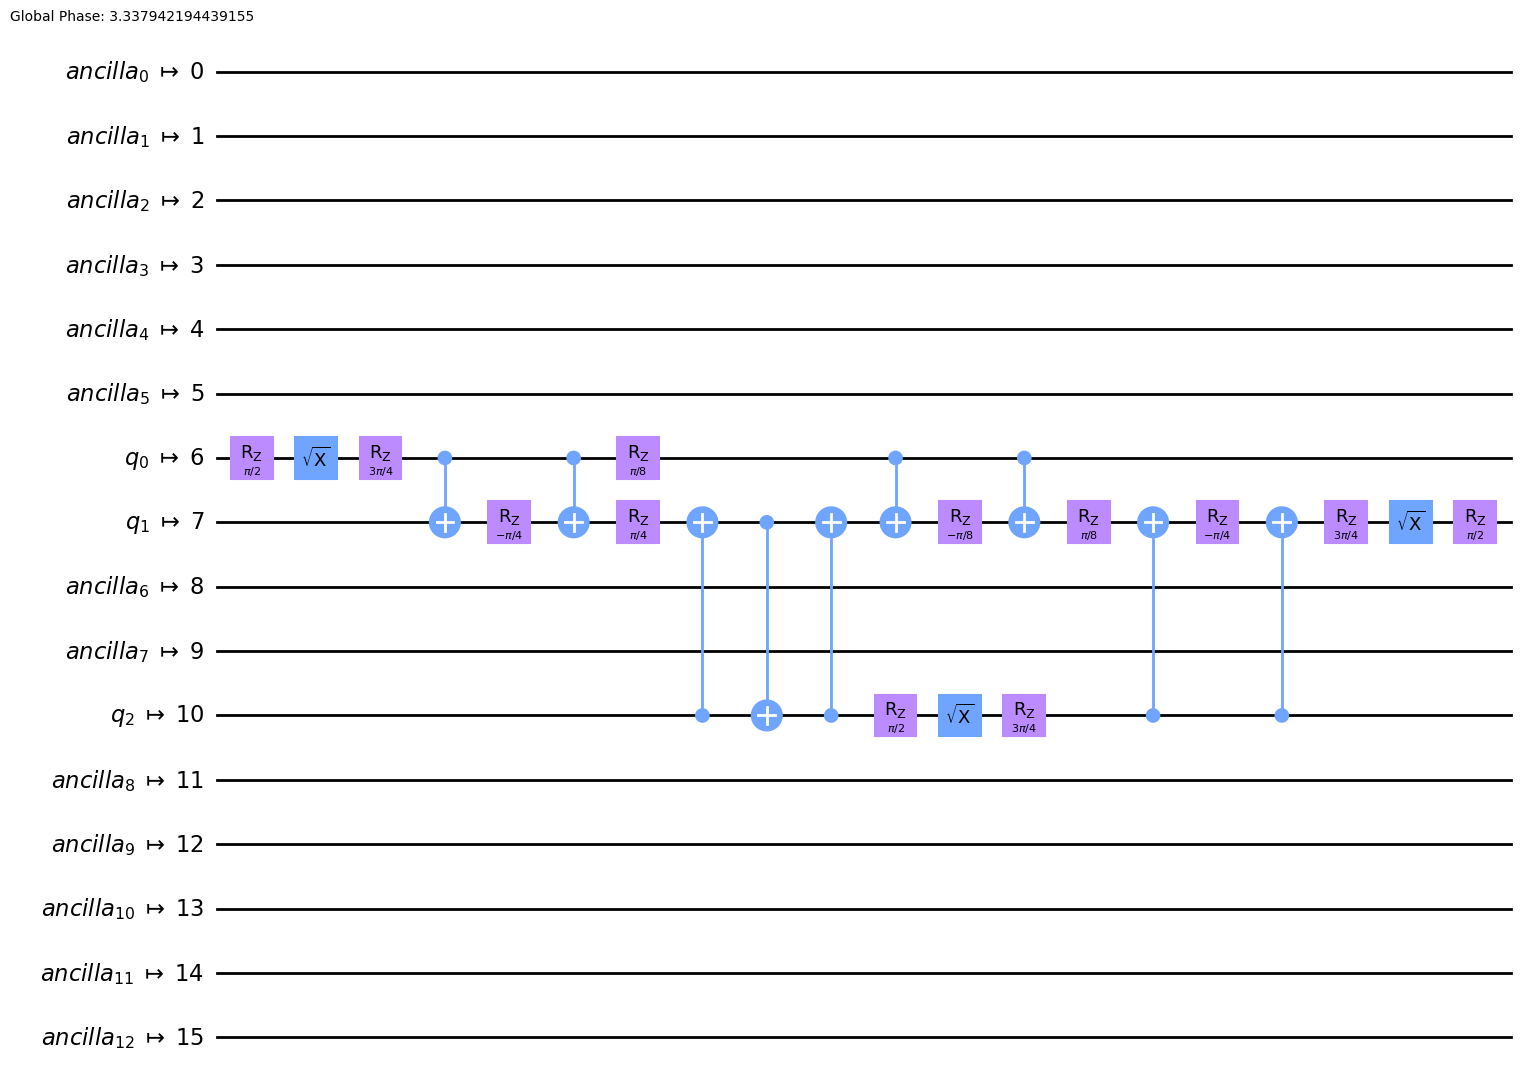

In [30]:
circuit_drawer(transpile(basicqft(3), backend), output='mpl')

# n = 4

## backend 안주고

In [31]:
basicqft(4).decompose(reps=3).count_ops()['cx']

12

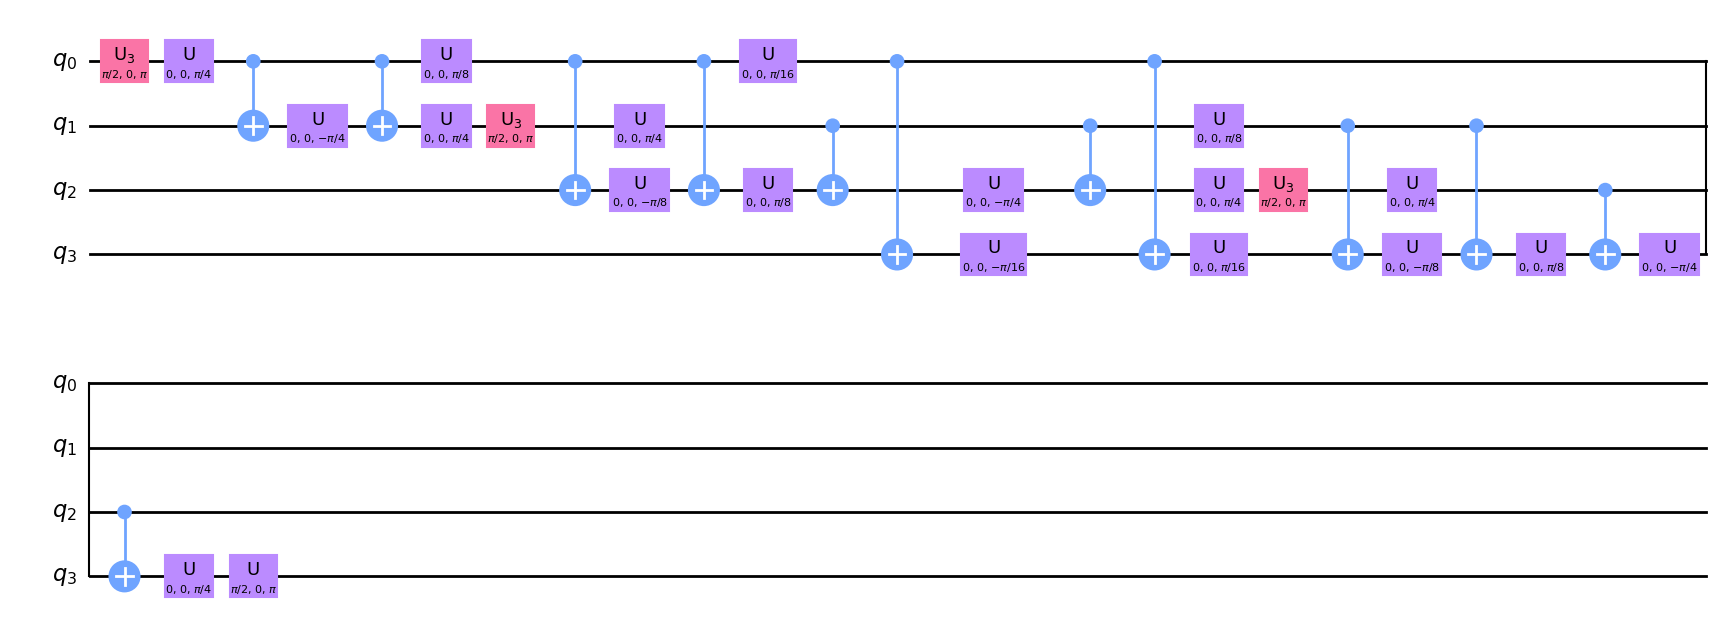

In [32]:
basicqft(4).decompose(reps=3).draw(output='mpl')

## backend 주고

In [33]:
transpile(basicqft(4), backend).count_ops()['cx']

21

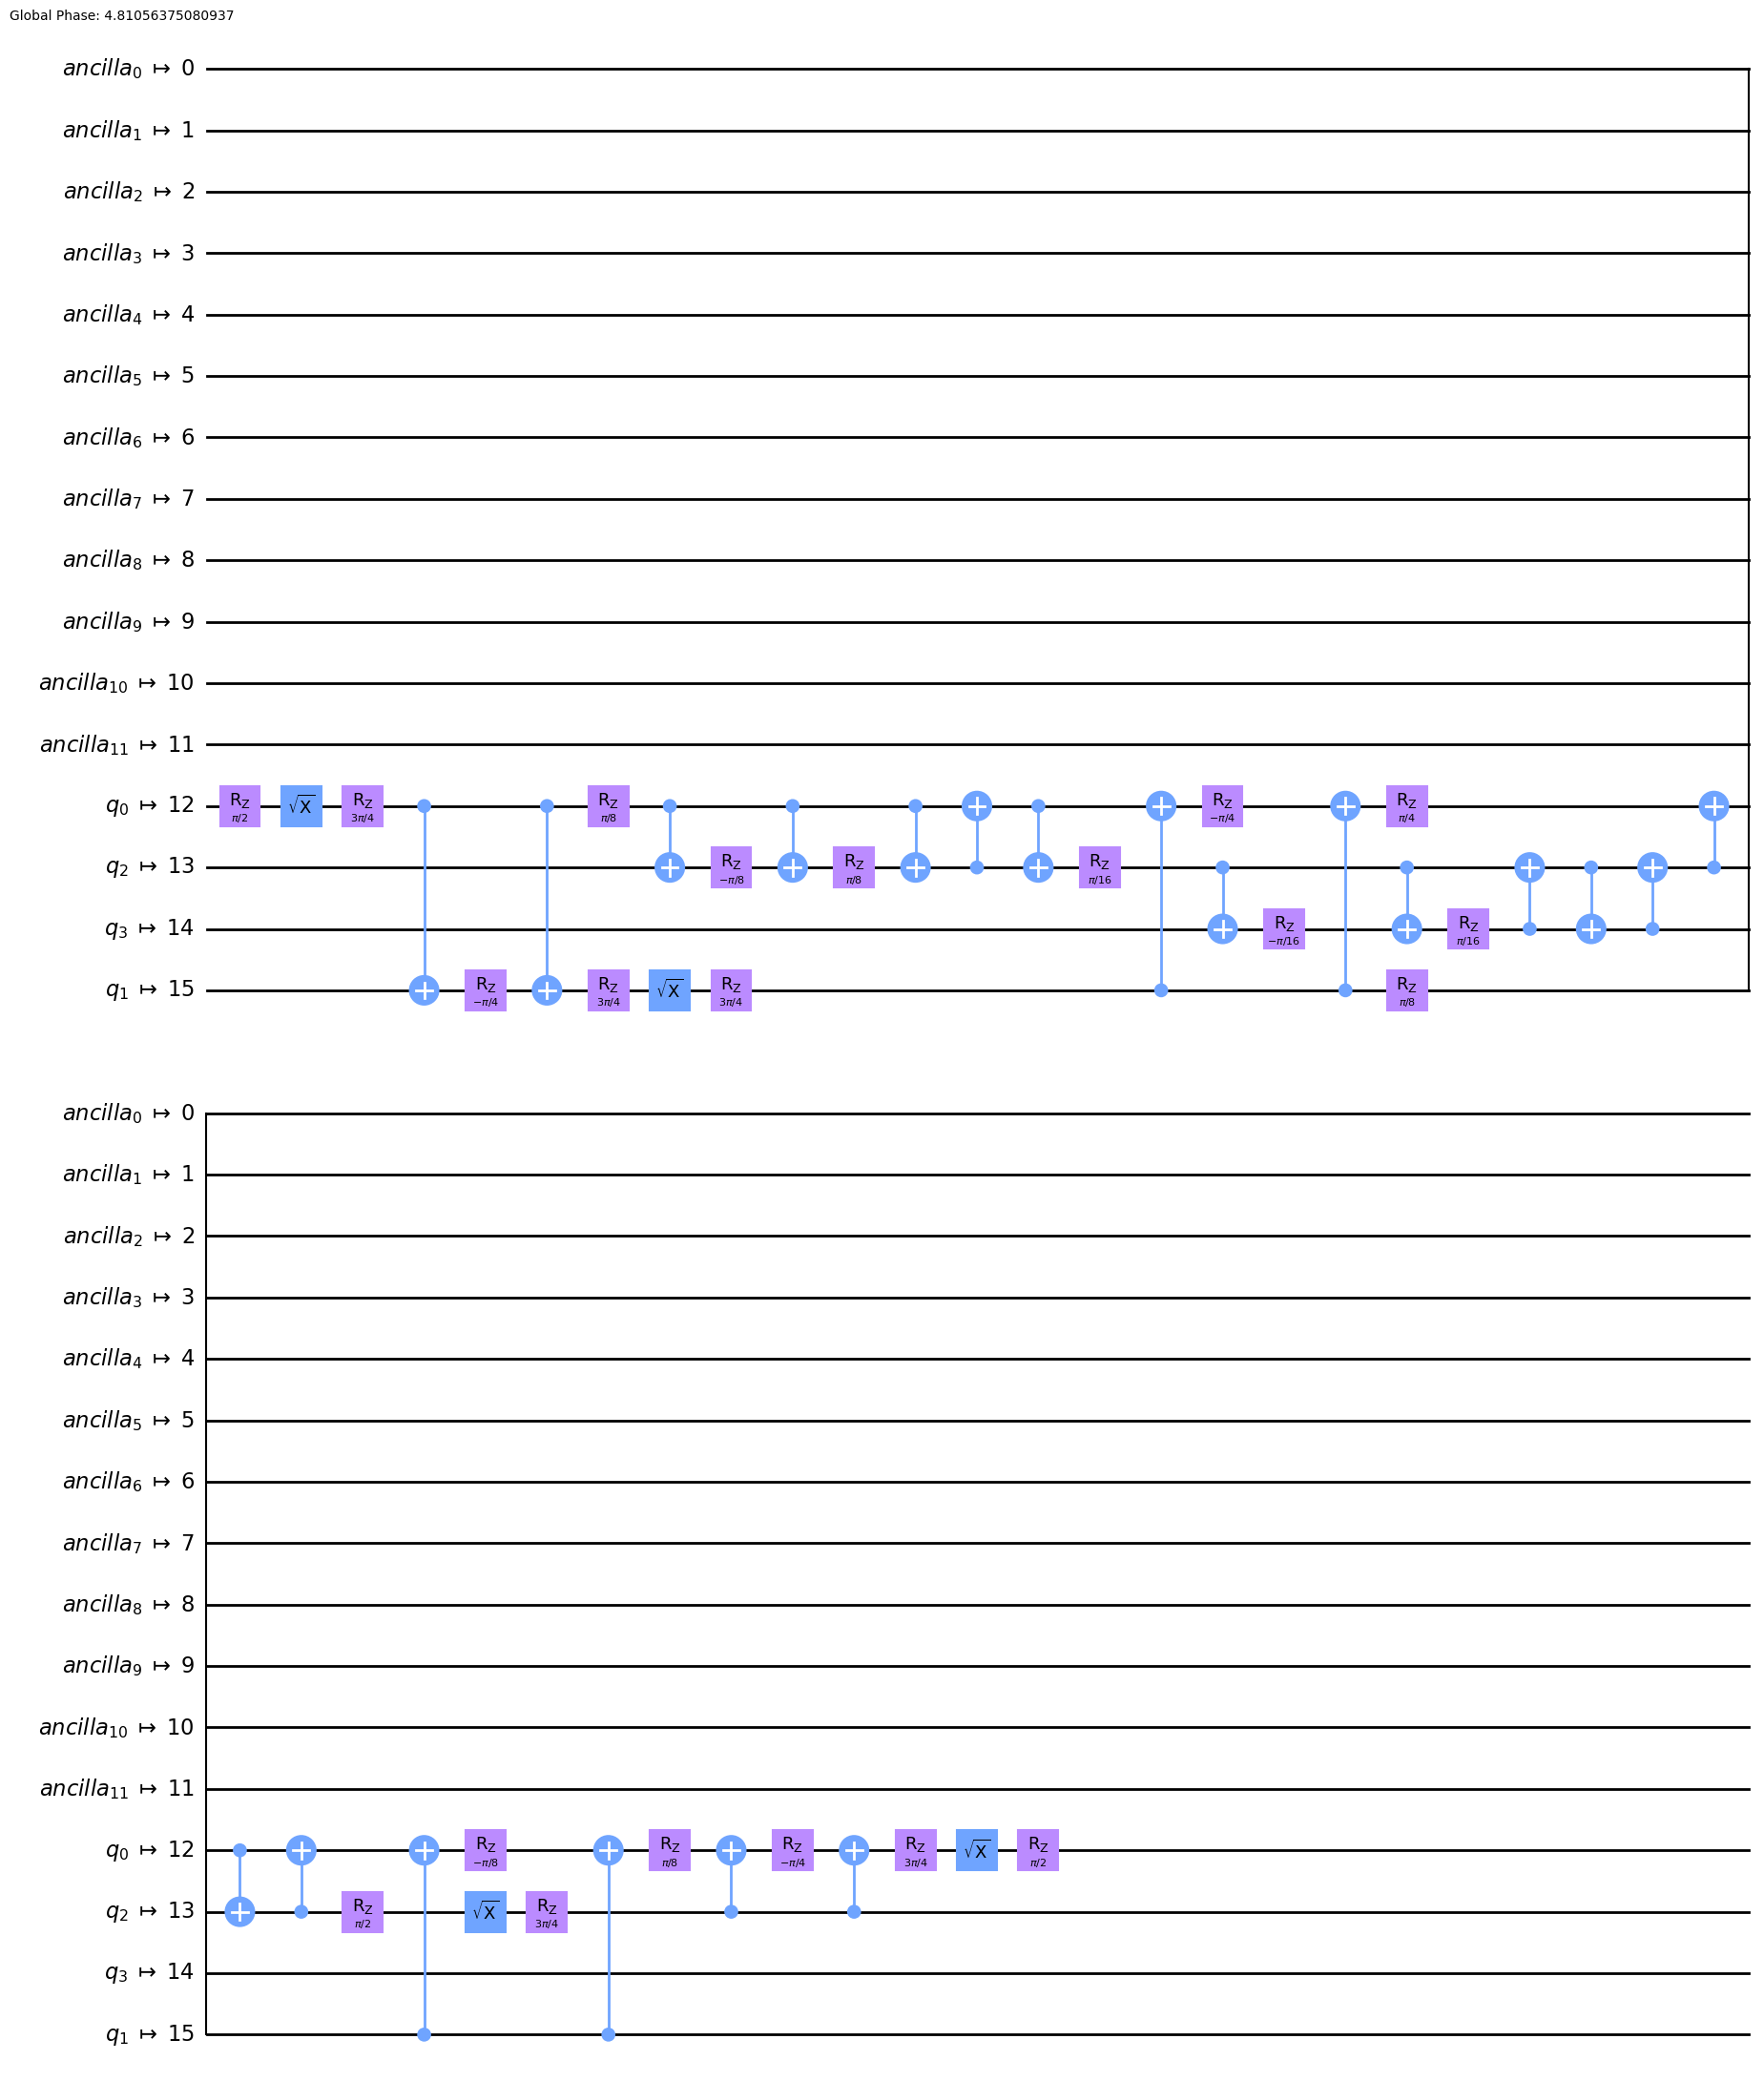

In [34]:
circuit_drawer(transpile(basicqft(4), backend), output='mpl')